The following simulation is based on the following paper:

Mejias, J. F., Murray, J. D., Kennedy, H., & Wang, X. J. (2016). Feedforward and feedback frequency-dependent interactions in a large-scale laminar network of the primate cortex. Science advances, 2(11), e1601335.

In [1]:
import numpy as np
import math
import pylab as pl
import sys
import matplotlib.patches as mpatches

# power spectrum
from scipy import signal
import seaborn as sns
from scipy.fftpack import fft

In [17]:
def transduction(I_net, I_ext=0):
    """ Compute read-out of the input using transduction function. 
       
    Parameters
    ----------
    I_net : 
    
    I_ext : 
    
    Returns
    ----------
    
    """
    
    I_ext_matrix = np.ones(2) * I_ext
    phi = (I_net + I_ext_matrix) / (1 - np.exp(-(I_net + I_ext_matrix)))
    
    return phi

In [3]:
def xi(sigma):
    """ Compute white noise. 
    
    Parameters
    ----------
    sigma : 
    
    Returns
    ----------
    
    """
    
    mean = 0
    noise = np.random.normal(mean, sigma, 1)
    
    return noise

## Intra-laminar local circuit

Consider two recurrently connected populations, one being excitatory and one being inhibitory. 

In [4]:
def input_intra(r_E, r_I):
    """ Compute input at time t.  """
    
    I_net_E = J_EE * r_E + J_EI * r_I
    I_net_I = J_IE * r_E + J_II * r_I
    
    return [I_net_E, I_net_I]

In [51]:
def run(layer, iterations=500, dt=0.5, I_ext=0, plot=True):
    """ Run simulation. """
    
    # initialize network parameters
    tau = np.zeros(2)
    sigma = 0

    if layer == 2:
        tau = [tau_E_2, tau_I_2]
        sigma = sigma_2
    elif layer == 5:
        tau = [tau_E_5, tau_I_5]
        sigma = sigma_5
    else:
        print('Enter layer 2 or 5')
        return None
    
    # initialize time
    iterations = iterations
    dt = dt
    t = np.arange(0, iterations) * dt
    
    # initialize firing rate
    r = np.ones((2, iterations)) * 0.5
        
    # compute tau values
    tau_sqr = [math.sqrt(x) for x in tau]                  # sqrt(tau)
    tau_div = [1/x for x in tau]                           # 1/tau
    
    for t in range(1, iterations):

        # compute read-out of input 
        I_net = input_intra(r[0, t - 1], r[1, t - 1])      # network input
        phi = transduction(I_net, I_ext)                   # transduction function

        # update firing rate excitatory and inhibitory population
        drdt = np.multiply(-r[:, t - 1] + phi + tau_sqr * xi(sigma), tau_div)
        r[:, t] = r[:, t - 1] + dt * drdt

    return r

In [52]:
def visualize(title, r):
    """ Visualise firing rates. """
    
    # run and plot simulation
    pl.subplots(1, 2, figsize=(12, 4))

    # layer 2
    pl.subplot(1, 2, 1)
    pl.title(title, size=15)
    pl.plot(r[0, :], 'red', label='exc')
    pl.ylabel('Firing rate')
    pl.xlabel('time')
    pl.xticks([])
    pl.subplot(1, 2, 2)
    pl.plot(r[1, :], 'blue', label='inh')
    pl.xlabel('time')
    pl.xticks([])
    
    exc_patch = mpatches.Patch(color='red', label='exc')
    inh_patch = mpatches.Patch(color='blue', label='inh')
    pl.legend(handles=[exc_patch, inh_patch], loc='center left', bbox_to_anchor=(1, 0.5))

### Run simulation

In [53]:
# initialize parameters

tau_E_2 = 6        # time constant
tau_I_2 = 15
tau_E_5 = 30
tau_I_5 = 75

sigma_2 = 0.3      # noise
sigma_5 = 0.45

J_EE = 1.5         # connection strengths
J_IE = 3.5
J_EI = -3.25
J_II = -2.5

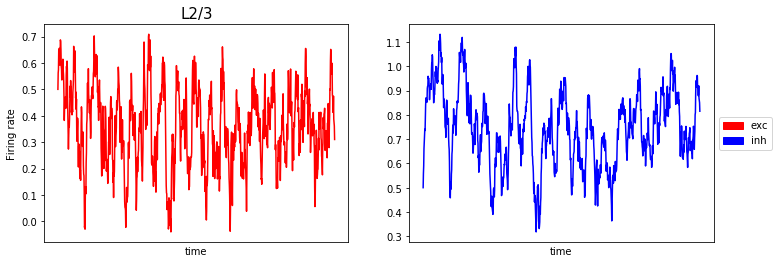

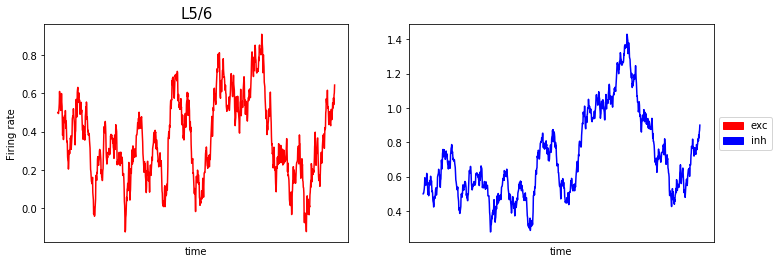

In [58]:
iterations = 1000  # initialize time
dt = 0.5

I_ext = 0          # external input (optional)  

# run simulation 
firing_rate_2 = run(2, iterations, dt, I_ext)  # layer 2/3
firing_rate_5 = run(5, iterations, dt, I_ext)  # layer 5/6

# plot results
if firing_rate_2 is not None:
    visualize('L2/3', firing_rate_2)

if firing_rate_5 is not None:
    visualize('L5/6', firing_rate_5)